In [31]:
%pip install scikit-learn


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip available: 22.3 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [32]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn.cluster import KMeans

In [33]:
image_path="../output_videos/cropped_image_1.png"
image=cv2.imread(image_path)
image=cv2.cvtColor(image,cv2.COLOR_BGR2RGB)


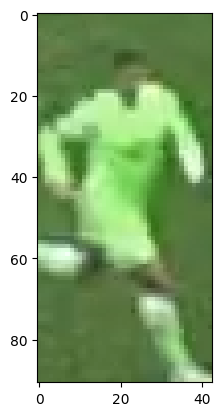

In [34]:
plt.imshow(image)

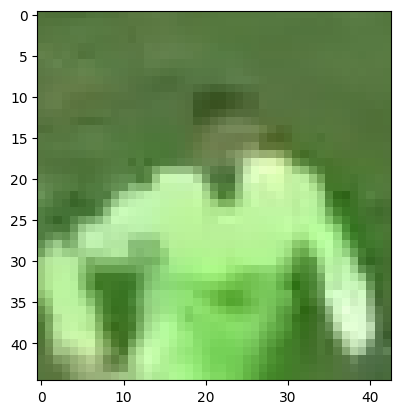

In [35]:
#take the tophalf of the image
top_half=image[0:int(image.shape[0]/2),:]
plt.imshow(top_half)
plt.show()

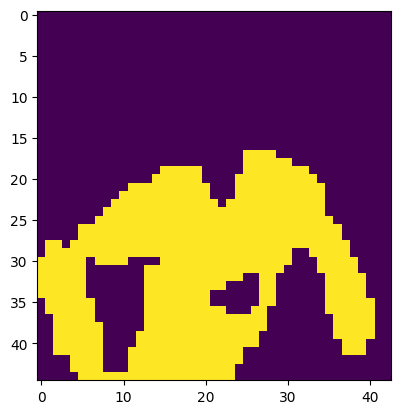

In [36]:
#clustering image into 2 
#reshape the image to 2d array 
image_2d=top_half.reshape((-1,3))

#performing kmeans clustering 
kmeans=KMeans(n_clusters=2,random_state=21).fit(image_2d)

#get the cluster labels
labels=kmeans.labels_

#reshape the labels to the original image shape
clustered_image=labels.reshape(top_half.shape[0],top_half.shape[1])

plt.imshow(clustered_image)
plt.show()



In [38]:
corner_clusters =[clustered_image[0,0],clustered_image[0,-1],clustered_image[-1,0],clustered_image[-1,-1]]
non_player_clusters=max(set(corner_clusters), key=corner_clusters.count)
print("non_player_clusters: ", non_player_clusters) 

non_player_clusters:  0


In [39]:
player_cluster=1-non_player_clusters
print("player_cluster: ", player_cluster)

player_cluster:  1


In [40]:
kmeans.cluster_centers_[player_cluster]

array([169.06      , 226.92615385, 142.24461538])